In [1]:
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline
from copy import deepcopy,copy

(600, 1000, 4)


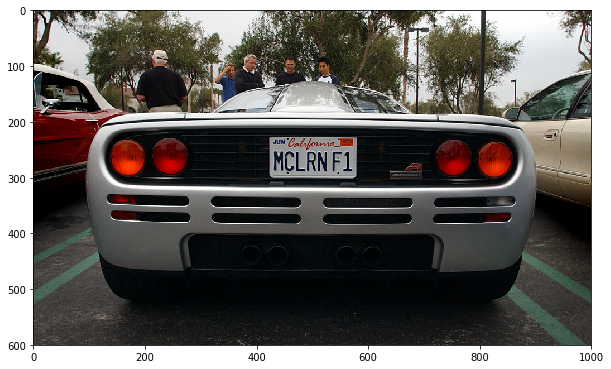

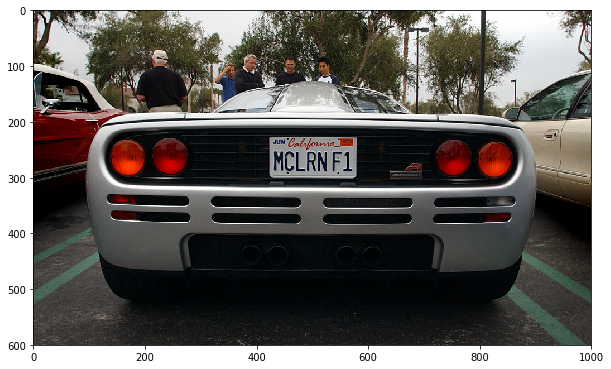

In [3]:
im = io.imread("C:/Users/win10/Downloads/OpenCV_3_License_Plate_Recognition_Python-master/OpenCV_3_License_Plate_Recognition_Python-master/LicPlateImages/1.png")
print im.shape
plt.figure(0,figsize = [10,15])
plt.imshow(im)

new_image = deepcopy(im)
plt.figure(1,figsize = [10,15])
plt.imshow(new_image)

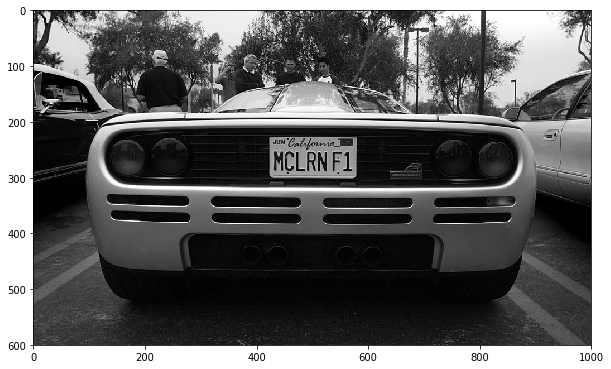

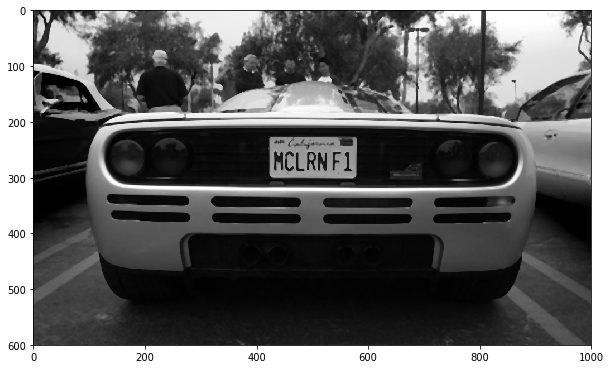

In [4]:
gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
plt.figure(3,figsize = [10,15])
plt.imshow(gray,cmap = "gray")

gray_image = cv2.medianBlur(gray, 5)
plt.figure(4,figsize = [10,15])
plt.imshow(gray_image,cmap = "gray")

[[255 255 255 ...,   0   0   0]
 [255 255 255 ...,   0   0   0]
 [255 255 255 ...,   0   0   0]
 ..., 
 [255 255 255 ..., 255   0   0]
 [255 255 255 ..., 255   0   0]
 [255 255 255 ..., 255   0   0]]
<type 'numpy.ndarray'>


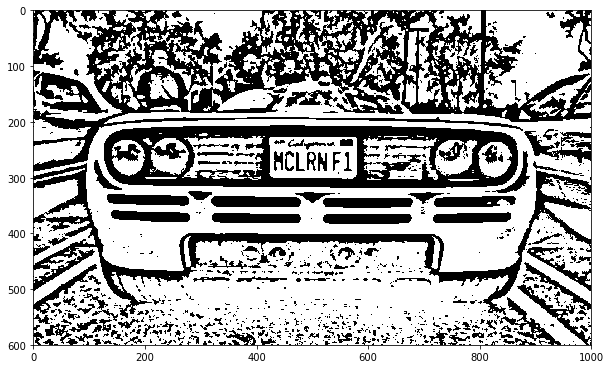

In [5]:
binary_img = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,43,2)

plt.figure(5,figsize = [10,15])
plt.imshow(binary_img,cmap="gray")

print binary_img
print type(binary_img)


[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
<type 'numpy.ndarray'>


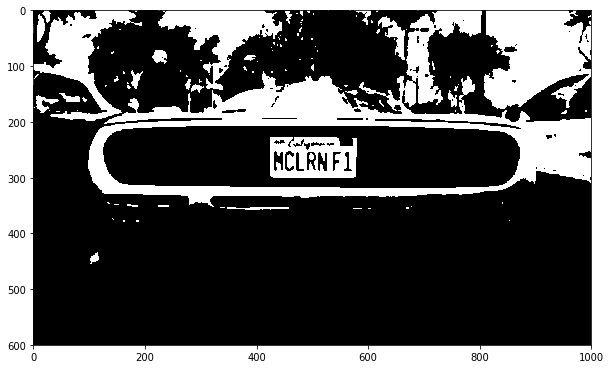

In [6]:
from skimage.filters import threshold_otsu

threshold_value = threshold_otsu(gray_image)
binary_car_image = gray_image > threshold_value
plt.figure(6,figsize = [10,15])
plt.imshow(binary_car_image,cmap = "gray")

binary_car_img = binary_car_image*255

print binary_car_img
print type(binary_car_img)

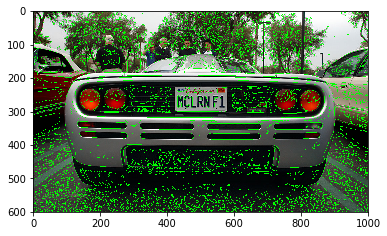

In [7]:
_,contours,_ = cv2.findContours(binary_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda x: cv2.contourArea(x))
fuck off bi
zxzx = im[:, :, :3].copy()
cv2.drawContours(zxzx, contours, -1, (0,255,0), 1)
plt.imshow(zxzx)

In [18]:
roi = []
w,h,x,y = 0,0,0,0

for contour in contours:
    area = cv2.contourArea(contour)

# rough range of areas of a license plate
    if area > 6000 and area < 40000:
        [x,y,w,h] = cv2.boundingRect(contour)

    # rough dimensions of a license plate
        if w > 100 and w < 200 and h > 60 and h < 100:
            roi.append([x,y,w,h])
            cv2.rectangle(im, (x,y), (x+w, y+h), (0,255,0), 10)
print len(roi)
print roi[0]

2
[271, 226, 143, 76]


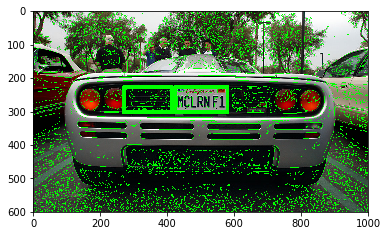

In [19]:
zxzx = im[:, :, :3].copy()
cv2.drawContours(zxzx, contours, -1, (0,255,0), 1)
plt.imshow(zxzx)

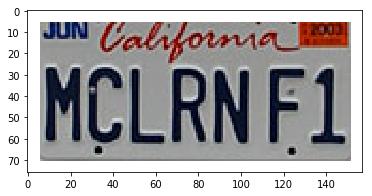

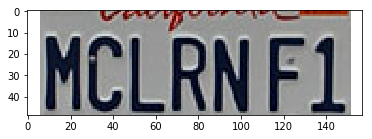

In [9]:
if len(roi) >= 1:
    [x,y,w,h] = roi[1]
    plate_image = im[y:y+h,x:x+w]
    
plt.figure(3)
plt.imshow(plate_image)

ed_plate = plate_image[15:64,:]
plt.figure(4)
plt.imshow(ed_plate)

(49, 157)


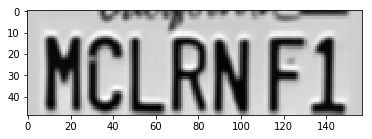

In [10]:
img = cv2.GaussianBlur(ed_plate, (5, 5), 1)
#img2 = cv2.medianBlur(img, 1)
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print gray1.shape

#plt.figure(6)
#plt.imshow(img)
plt.figure(7)
plt.imshow(gray1, cmap='gray')

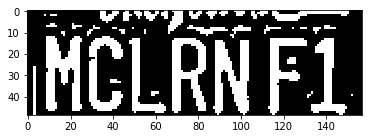

In [11]:
th = 255 - cv2.adaptiveThreshold(gray1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(th, cmap='gray')

In [12]:
kim = th.copy()
print kim.shape

(49, 157)


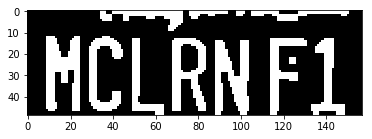

In [13]:
kernel = np.ones((3, 3)) / 9.0
a = cv2.dilate(kim, kernel, iterations=1)
a = cv2.erode(a, kernel, iterations=1)
a = cv2.morphologyEx(a, cv2.MORPH_OPEN, kernel)
a = cv2.morphologyEx(a, cv2.MORPH_CLOSE, kernel)

plt.imshow(a, cmap='gray')

13


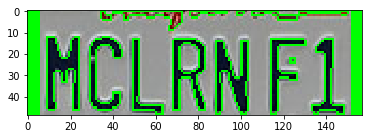

In [14]:
image, cnts, _ = cv2.findContours(a, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=lambda x: cv2.contourArea(x))
print len(cnts)

zxzx = ed_plate[:, :, :3].copy()
cv2.drawContours(zxzx, cnts, -1, (0,255,0), 1)

plt.imshow(zxzx)

(600, 1000, 3) 0.0
[49, 114, 133, 29, 88, 9, 68]
(20, 10)
uint8
(1, 200)


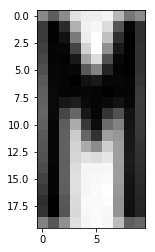

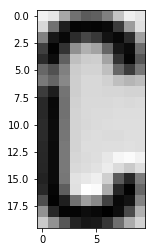

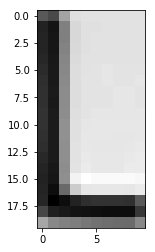

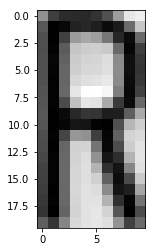

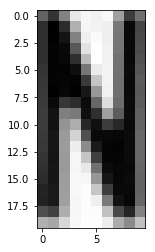

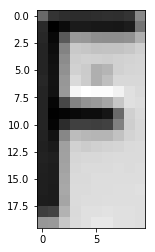

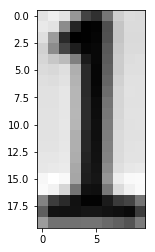

In [15]:
em = np.zeros(gray.shape + (3,), dtype=np.uint8)
print em.shape, em.mean()
#kk = 0
characters = []
column_list = []
for ix in cnts:
    if cv2.contourArea(ix) > 50:
        #print cv2.contourArea(ix), cv2.boundingRect(ix)
        x, y, w, h = cv2.boundingRect(ix)
        if np.abs(w-h) < 150:
            #plt.figure(kk)
            section = gray1[y:y+h, x:x+w]
            resized_char = cv2.resize(section, (10, 20))
            #print resized_char.shape
           # print type(resized_char)
            #plt.imshow(resized_char, cmap='gray')
            
            characters.append(resized_char)
            
            
            #kk += 1
            column_list.append(x)
            #cv2.drawContours(em, [ix], -1, (0, 255, 0), 3)

characters = characters[-7:]
column_list = column_list[-7:]
print column_list



# SORTING NUMBER PLATE CHARACTERS 
dict_01 = {}
for i in range(len(characters)):
    dict_01[column_list[i]] = characters[i]

sorted_char = [values for (keys,values) in sorted(dict_01.items())]

#plt.figure(51)
#plt.imshow(sorted_char[0],cmap = "gray")
print sorted_char[0].shape
print sorted_char[0].dtype
flat_bin_image1 = sorted_char[0].reshape(1,-1)
print flat_bin_image1.shape
k=0
for i in sorted_char:
        plt.figure(k)
        plt.imshow(i,cmap = "gray")
        k += 1


In [16]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from skimage.io import imread
from skimage.filters import threshold_otsu

letters = [
            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
            'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y', 'Z'
        ]

def read_training_data(training_directory):
    image_data = []
    target_data = []
    for each_letter in letters:
        for each in range(10):
            image_path = os.path.join(training_directory, each_letter, each_letter + '_' + str(each) + '.jpg')
            # read each image of each character
            img_details = imread(image_path, as_grey=True)
            
            # converts each character image to binary image
            binary_image = img_details < threshold_otsu(img_details)
            # the 2D array of each image is flattened because the machine learning
            # classifier requires that each sample is a 1D array
            # therefore the 20*20 image becomes 1*400
            # in machine learning terms that's 400 features with each pixel
            # representing a feature
            flat_bin_image = binary_image.reshape(-1)
            #print flat_bin_image.shape
            image_data.append(flat_bin_image)
            target_data.append(each_letter)

    return (np.array(image_data), np.array(target_data))

def cross_validation(model, num_of_fold, train_data, train_label):
    # this uses the concept of cross validation to measure the accuracy
    # of a model, the num_of_fold determines the type of validation
    # e.g if num_of_fold is 4, then we are performing a 4-fold cross validation
    # it will divide the dataset into 4 and use 1/4 of it for testing
    # and the remaining 3/4 for the training
    accuracy_result = cross_val_score(model, train_data, train_label,
                                      cv=num_of_fold)
    #print accuracy_result
    
    avg = np.mean(accuracy_result)
    #print avg
    accuracy = avg*100
    print "ACCURACY OF THE SVC MODEL USING "+str(num_of_fold) +"-FOLD CROSS VALIDATION METHOD : " + str(accuracy)
    
    


#current_dir = os.path.dirname(os.path.realpath("train"))

#training_dataset_dir = os.path.join(current_dir, 'train')

training_dataset_dir = os.path.realpath('train')

#print training_dataset_dir

image_data, target_data = read_training_data(training_dataset_dir)
#print image_data.shape
#print target_data.shape

# the kernel can be 'linear', 'poly' or 'rbf'
# the probability was set to True so as to show
# how sure the model is of it's prediction
svc_model = SVC(gamma = 0.001,C = 100,kernel='linear', probability=True)
#svc_model = SVC(gamma = 0.001, C = 100,kernel='linear', probability=True)
cross_validation(svc_model, 7, image_data, target_data)

# let's train the model with all the input data
svc_model.fit(image_data, target_data)
#flat_bin_image2 = image_data[20].reshape(1,-1)
#print svc_model.predict(flat_bin_image2)


c:\python27\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


ACCURACY OF THE SVC MODEL USING 7-FOLD CROSS VALIDATION METHOD : 98.1092436975


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
classification_result = []
for each_character in sorted_char:
    # converts it to a 1D array
    #im_g = cv2.cvtColor(each_character, cv2.COLOR_BGR2GRAY)
    im_b = each_character < threshold_otsu(each_character)
    each_character = im_b.reshape(1,-1)
    #print each_character.dtype
    result = svc_model.predict(each_character)
    classification_result.append(result)

#print(classification_result)

plate_string = ''
for eachPredict in classification_result:
    plate_string += eachPredict[0]

print "PREDICTED NUMBER PLATE : " + plate_string

PREDICTED NUMBER PLATE : MCLRNF1
